In [40]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [41]:
tips =sns.load_dataset('tips') # This is  a default data set included in seaborn

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# .distplot()

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


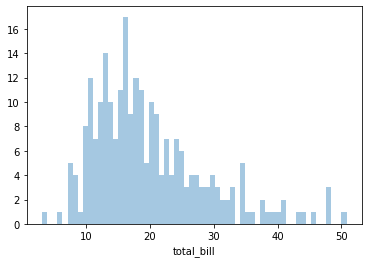

In [43]:
## .distplot() is a tool that shows off the distribution of values according just on column
## It shows off a tendency line called kde, which can be removed by applying kde=False
# It also have the so called bins, which makes the histogram more accurate
#sns.distplot(tips['total_bill'])
sns.distplot(tips['total_bill'], kde=False, bins= 60)

# .jointplot()

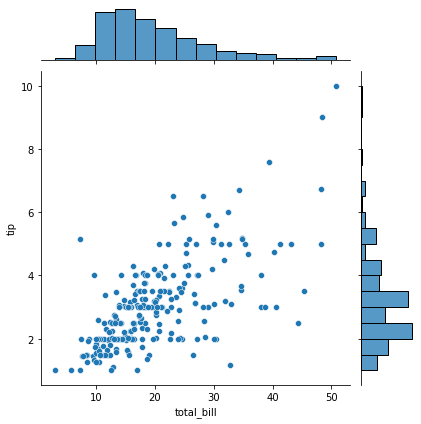

In [44]:
## It can join two different .distplots()

sns.jointplot(x='total_bill', y='tip', data=tips)

#sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
#sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
#sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

# .pairplot()

In [45]:
## .this will carry out a .jointplot() of the allocated dataset for every possible combination
## it combines each numerical value, but not strings
## for take strings into account we use the parameter pairplot(dataset, hue='column name')
##### we call this columns as categoric columns because they have 2 or more categories

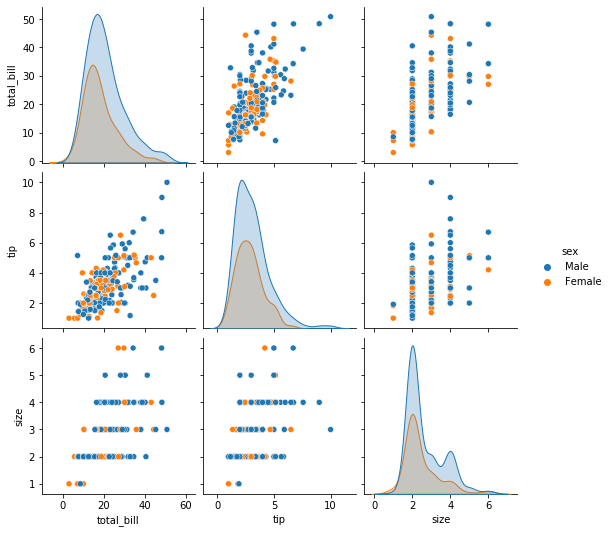

In [46]:
#sns.pairplot(tips)
sns.pairplot(tips, hue='sex')

# .rugplot()

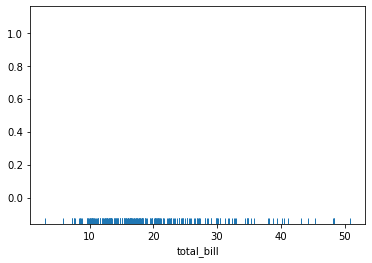

In [47]:
# This marks a dash point for each point of a series.
## It is essentially similar to .distplot(), but instead of adding points together for
## creating an historgram, it shows every single point
sns.rugplot(tips['total_bill'])

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


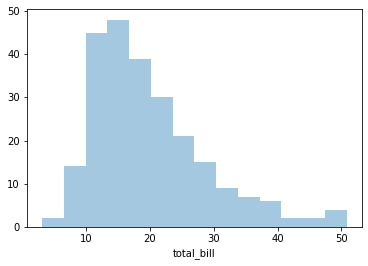

In [48]:
sns.distplot(tips['total_bill'],kde=False)

## CREATE A DATASET

In [49]:
dataset = np.random.randn(25)

In [50]:
dataset

array([ 0.41495673, -0.08753027, -0.65358865,  0.12257324, -1.15369473,
       -0.92289094, -0.19435196,  0.06181388,  0.66010576,  1.16350533,
        0.277396  ,  0.0954217 ,  0.98536218, -0.19275831,  1.64044769,
        0.21190636,  0.71088383, -1.51542213,  0.05761499, -0.57662853,
       -1.91521127, -0.89320006, -0.09164712,  0.28728654,  0.19195087])

In [51]:
# Set up the x axis for the plot

x_min = dataset.min()-2
x_max = dataset.max()+2
# 100 equaly spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

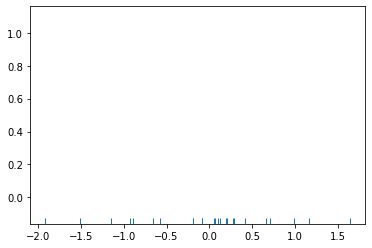

In [52]:
# create another rugplot()
sns.rugplot(dataset)

### KDE -kernel distribution estimation
#### It can be understood by the sum of all gaussian distributions which are allocated to each point of a series

(0, 1)

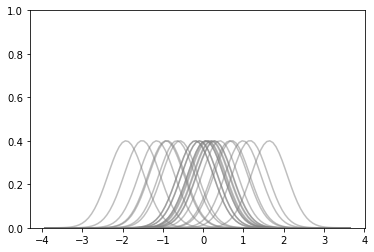

In [53]:
# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

### Here below we can observe a gaussian distribution of each point of the series
### so the kde would be the sum of all

Text(0.5, 0.98, 'Sum of the Basis Functions')

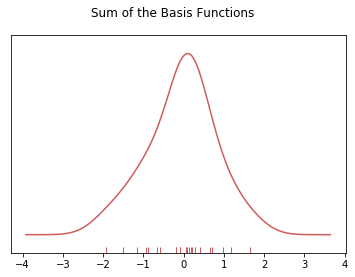

In [54]:
### To get the kde we can add together all these basis functions

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

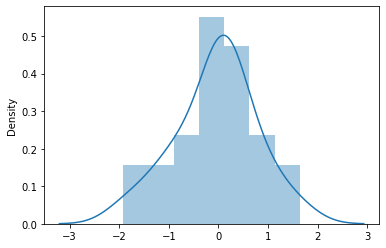

In [55]:
## We can check how similar this one above is to the one created by .distplot()

sns.distplot(dataset)